# Comp 6934 Winter 2025 Note 6

These notes are modified from notes by Dr. Terrance Tricco.

by E Brown.

In this notebook, we will look at the functional and object-oriented interfaces of matplotlib

Matplotlib API: https://matplotlib.org/stable/api/index.html

Data taken from:
* https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset



## Load Matplotlib library

Matplotlib has many submodules. We will be using the ``pyplot`` submodule, which contains all the plotting functionality that we will use.

The ``pyplot`` submodule is almost universally loaded as ``plt``. This convention should be adopted.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

## Load data

We shall load our trending YouTube video data set that we have been working with.

In [100]:
df = pd.read_csv('datasets/CA_videos.csv', parse_dates=['trending_date', 'publish_time'])

Let's work with a smaller data set to keep things clear.

In [101]:
df = df[df.channel_title == 'Marvel Entertainment'].sort_values(by='views')

# Basic plotting using the functional plot interface

Matplotlib's ``plt.plot()`` is a basic way to plot *x* vs *y* data.

In [102]:
x = df['views']
y = df['likes']

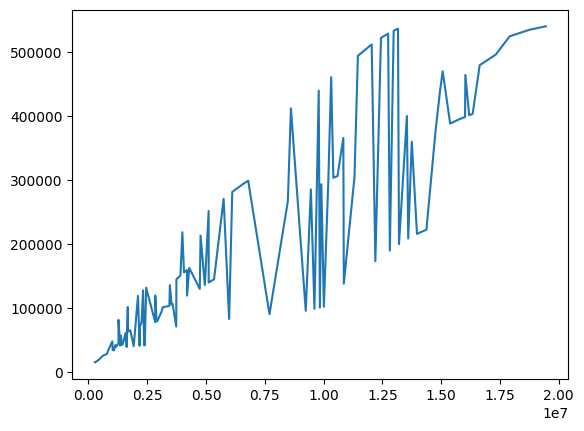

In [105]:
plt.plot(x, y)

There are many additional arguments that we can specify in ``plot()`` to customize our output. For example, we can change the colour of our line using ``color=``.

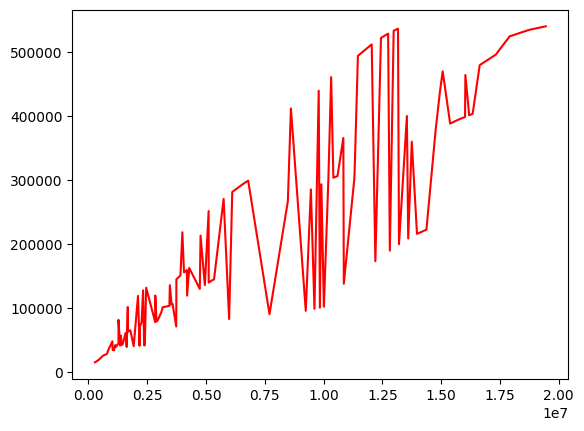

In [7]:
plt.plot(x, y, color='red')

Some other options include ``linewidth=`` to specify the thickness of the line and ``linestyle=`` to change between a solid line, dashed line, dotted line (and several others).

A full list can be found in the API: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

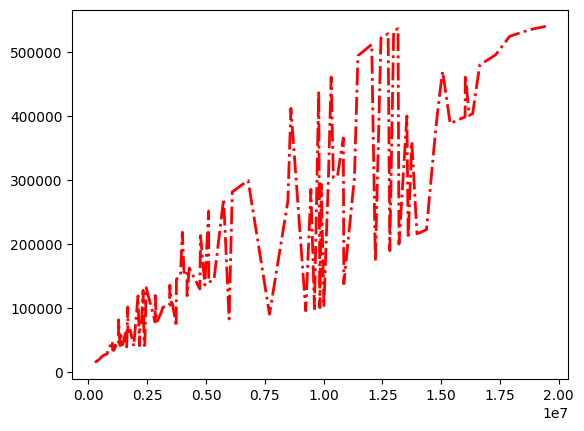

In [8]:
plt.plot(x, y, color='red', linewidth=2, linestyle='-.')

## Labelling our Plot

Our plot looks a bit bare so far. Some important elements that are missing include relevant labels. 

The functions ``plt.xlabel()``, ``plt.ylabel()``, and ``plt.title()`` can be used to add a title to the plot, as well as label the x-axis and y-axis.

Text(0.5, 1.0, 'Trending Marvel Entertainment Videos')

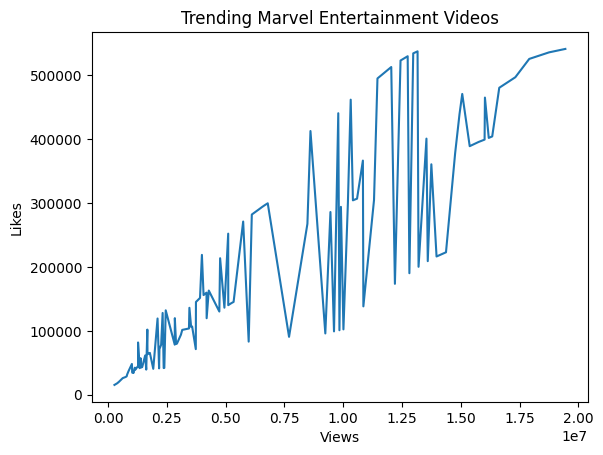

In [9]:
plt.plot(x, y)

plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Trending Marvel Entertainment Videos')

## Axes Scales

By default, Matplotlib plots using the minimum and maximum values for each axes.

Instead, we can specify the range of values we want displayed on the x- and y-axes. We might want to make the scales the same, for example.

``plt.xlim()`` and ``plt.ylim()`` take a tuple of the lower and upper bounds.

(0.0, 1000000.0)

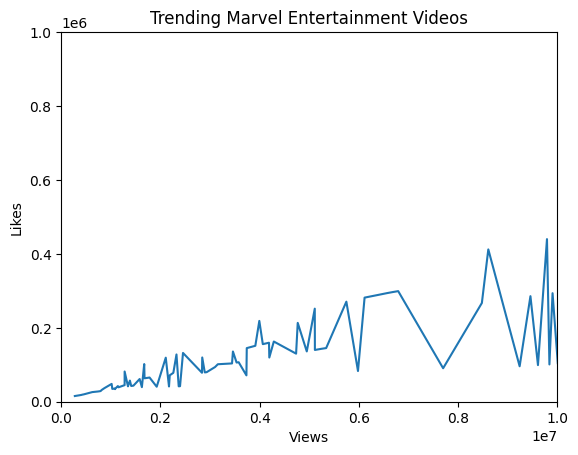

In [10]:
plt.plot(x, y)

plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Trending Marvel Entertainment Videos')

plt.xlim((0, 1e7))
plt.ylim((0, 1e6))

We could also zoom in a section.

(0.0, 200000.0)

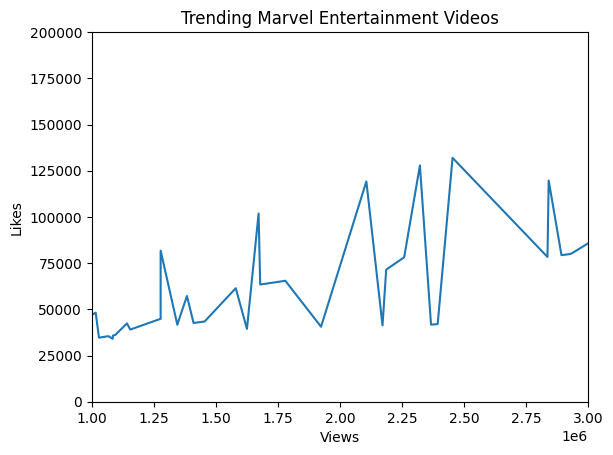

In [11]:
plt.plot(x, y)

plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Trending Marvel Entertainment Videos')

plt.xlim((1e6, 3e6))
plt.ylim((0, 2e5))

## Multi-line Plots

Including multiple lines is straightforward. Just call ``plot()`` a second time!

Text(0.5, 1.0, 'Trending Marvel Entertainment Videos')

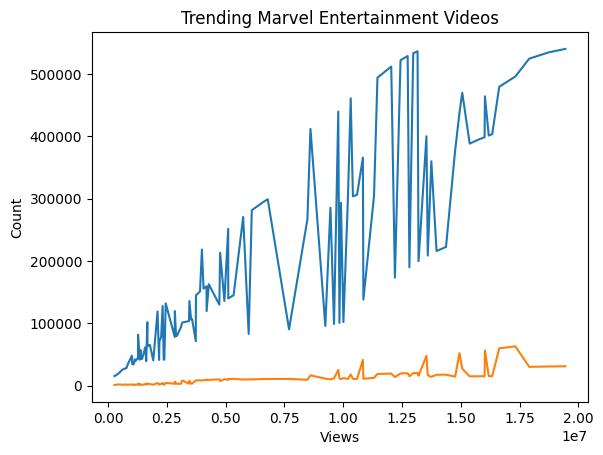

In [12]:
plt.plot(df['views'], df['likes'])
plt.plot(df['views'], df['comment_count'])

plt.xlabel('Views')
plt.ylabel('Count')
plt.title('Trending Marvel Entertainment Videos')

Each line can be customized in its own call.

Text(0.5, 1.0, 'Trending Marvel Entertainment Videos')

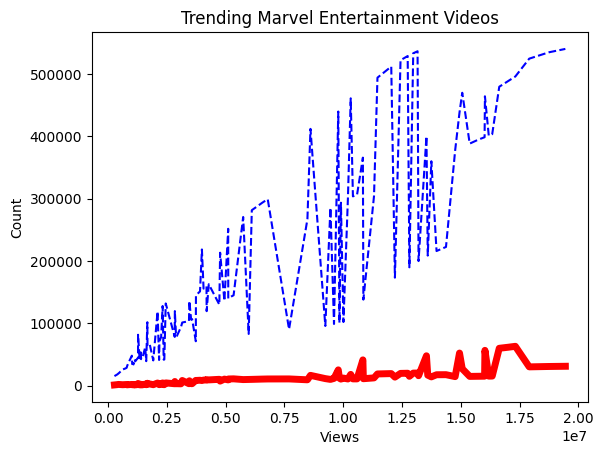

In [13]:
plt.plot(df['views'], df['likes'], color='blue', linestyle='--')
plt.plot(df['views'], df['comment_count'], color='red', linewidth=5)

plt.xlabel('Views')
plt.ylabel('Count')
plt.title('Trending Marvel Entertainment Videos')

## Legend

If you have multiple lines in your plot, then you will likely want to include a legend to label each line.

In each ``.plot()`` call, include a ``label=`` for each line.

Call ``plt.legend()`` to add a legend to the plot.

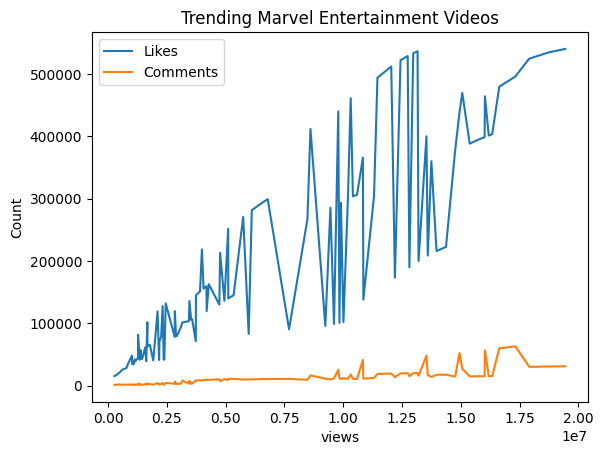

In [14]:
plt.plot(df['views'], df['likes'], label="Likes")
plt.plot(df['views'], df['comment_count'], label="Comments")

plt.xlabel('views')
plt.ylabel('Count')
plt.title('Trending Marvel Entertainment Videos')
plt.legend()

Matplotlib will try to find an appropriate location for the legend that is out of the way of the main plot elements.

You can explicitly specify the location of the legend by using its ``loc=`` argument. Some options for placement include ``'upper right'``, ``'upper left'``, ``'lower left'``, etc.

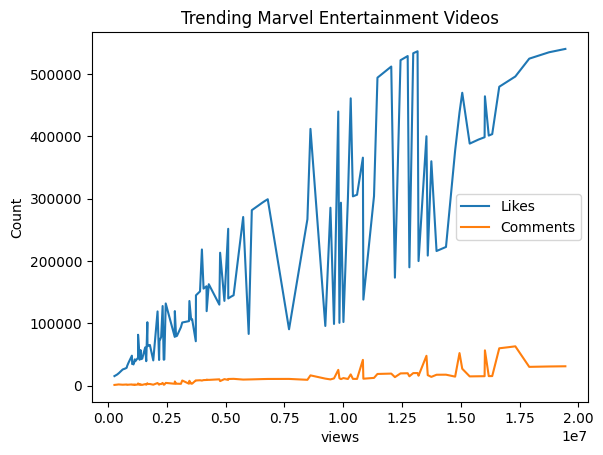

In [15]:
plt.plot(df['views'], df['likes'], label="Likes")
plt.plot(df['views'], df['comment_count'], label="Comments")

plt.xlabel('views')
plt.ylabel('Count')
plt.title('Trending Marvel Entertainment Videos')
plt.legend(loc='center right')

## Saving to File

Using ``plt.savefig()``, Matplotlib can save to many different file types, such as jpg, png, pdf, postscript and svg. 

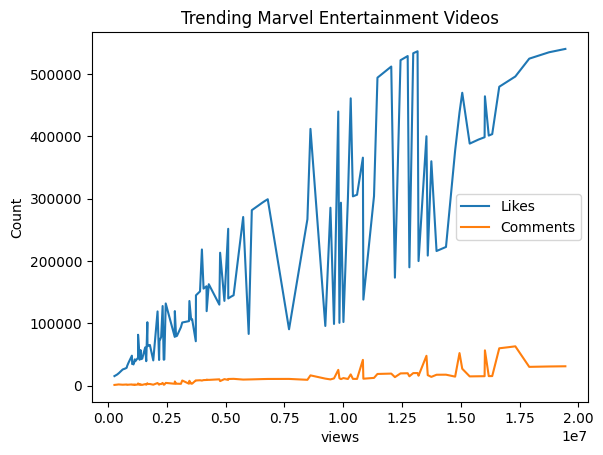

In [16]:
plt.plot(df['views'], df['likes'], label="Likes")
plt.plot(df['views'], df['comment_count'], label="Comments")

plt.xlabel('views')
plt.ylabel('Count')
plt.title('Trending Marvel Entertainment Videos')
plt.legend(loc='center right')

plt.savefig('trending-marvel.png')

Sometimes, when you save your plot to file, it may not fit correctly onto the canvas size leaving some elements (usually your labels) cut off. 

Calling ``plt.tight_layout()`` will re-adjust our plot so that all elements will display correctly on the canvas.

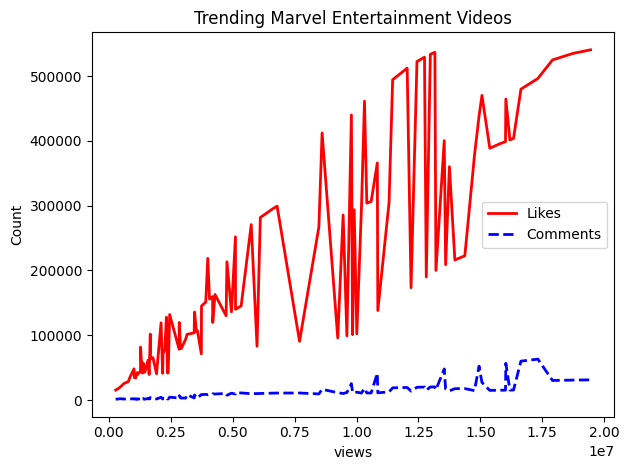

In [17]:
plt.plot(df['views'], df['likes'], label="Likes", color='red', linewidth=2)
plt.plot(df['views'], df['comment_count'], label="Comments", color='blue', linewidth=2, linestyle='--')

plt.xlabel('views')
plt.ylabel('Count')
plt.title('Trending Marvel Entertainment Videos')
plt.legend(loc='center right')

plt.tight_layout()
plt.savefig('trending-marvel.png')

## Summary: (Matplotlib functional API)

Matplotlib's functional API is a set of global functions to create and customize plots.

There are a number of functions that allow you to customize various elements of the plot. So far, we have been introduced to:
- ``plt.xlim()``
- ``plt.ylim()``
- ``plt.xlabel()``
- ``plt.ylabel()``
- ``plt.title()``
- ``plt.legend()``

Our plot can be saved to file using ``plt.savefig()``. Matplotlib can save to most common file formats.

Issues with elements of our plot being cut off when it has been saved to file can typically be resolved using ``plt.tight_layout()``.

Let's look at an example of a finished plot. In this case, we are making a line plot by calling ``plt.plot()``. Mulitple lines can be added to your axes by just calling plot() more than once.

In [ ]:
plt.plot(df['views'], df['likes'], label="Likes", color='#000088', linewidth=2, linestyle='-')
plt.plot(df['views'], df['comment_count'], label="Comments", color='#BB0000', linewidth=2, linestyle='--')

plt.xlim((0, df['views'].max()))
plt.ylim((0, 650000))
plt.xlabel('Views')
plt.ylabel('Number')
plt.title('Trending Marvel Entertainment Videos')
plt.legend(loc='upper left')

## Figure Size

Often times you will want to adjust the size of your plot. Either to make it bigger or to adjust its dimensions (aspect ratio).

This can be done by calling ``plt.figure(figsize=(width, height))``, where the ``figsize`` argument is a tuple of the ``width`` and ``height`` of the image, specified in inches. 

By default, Matplotlib uses a width of 6.4 inches and height of 4.8 inches (4:3 ratio).

In [ ]:
plt.figure(figsize=(8, 4.5))

plt.plot(df['views'], df['likes'], label="Likes", color='#000088', linewidth=2, linestyle='-')
plt.plot(df['views'], df['comment_count'], label="Comments", color='#BB0000', linewidth=2, linestyle='--')

plt.xlim((0, df['views'].max()))
plt.ylim((0, 650000))
plt.xlabel('Views')
plt.ylabel('Number')
plt.title('Trending Marvel Entertainment Videos')
plt.legend(loc='upper left')

The correct figure size for your image depends on many factors.

- Does your image function better for a particular aspect ratio given the nature of your data or plot type?


- What medium are you designing for? (And what medium will your users likely view it?) Social media may prefer portrait-style orientations (tall). Embedding in a Powerpoint presentation often works well for widescreen (landscape). 


- Are there other elements surrounding your image that you need to coordinate with (e.g., text)?




# Matplotlib's Object-Oriented Interfaces

So far we have looked at Matplotlib's functional API. These are a set of global functions to handle plotting.

These plot methods apply to a default or 'active' plot figure, so we do not have to specify which figure is being manipulted. But it is also possible to create multiple figure objects, and manipulate them independently.

This latter approach is effectively an Object-Oriented Interface. The object-oriented interface has all the same capability as the functional interface. However, you will explicitly create ``Figure`` and ``Axes`` objects, which are otherwise handled transparently behind the scene when using the functional interface. In addition, you can have more control over details such as axis display and format.

## Figure and Axes

We have used ``plt.figure()`` already to change the figure size of our object. Its return type is a ``Figure`` object, so we can use this as a constructor to create Figures and make them the active figure.

In [25]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [27]:
type(fig)

matplotlib.figure.Figure

The ``Figure`` object is our general catch-all container for everything in our image.

To make a plot, we create an ``Axes`` object and add that to our ``Figure`` container. The method ``add_axes()`` for our Figure object will return an ``Axes`` object, which can be store in a variable (which we have called ax, in this case).

The first argument for ``add_axes()`` specifies the dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.

In [28]:
# Create an axes that has left and bottom corners at 0, 0 (bottom left corner)
# with width and height 100% of the Figure width and height.

ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])

Our Axes is empty so far. Let's add a plot to it.

In [29]:
ax.plot(df['views'], df['likes'])

We can then look at our finished Figure.

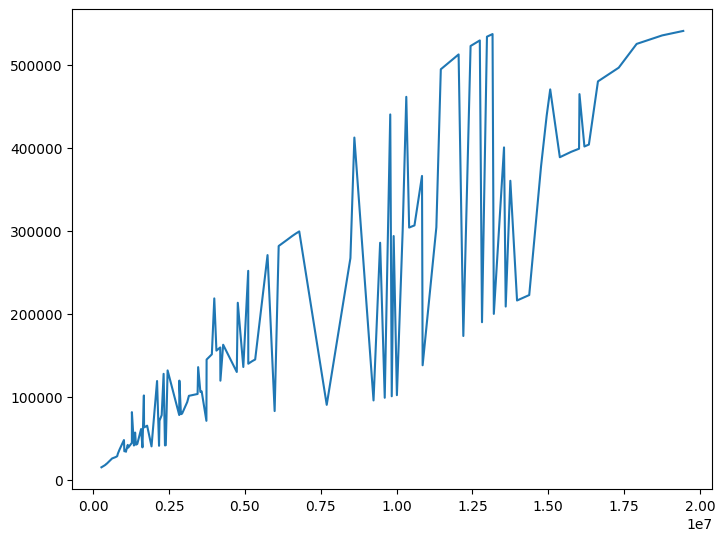

In [33]:
fig

Of course, all of this could be put into a single cell for brevity.

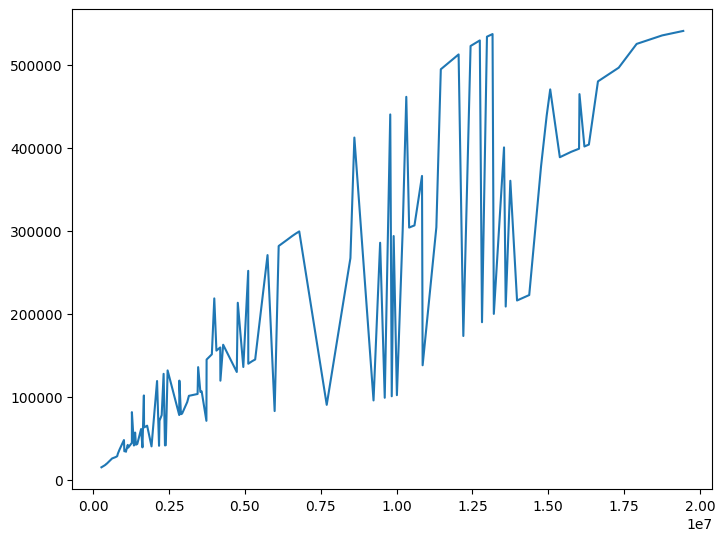

In [43]:
fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(df['views'], df['likes'])

fig

## Customizing Plots in Objects

Most of the plotting functions in Matplotlib's functional plotting interface are mirrored in the Figure and Axes objects. There is a direct 1-to-1 correspondence between the two.

Let's add the labelling and stylistic elements to our plot, as we have done previously.

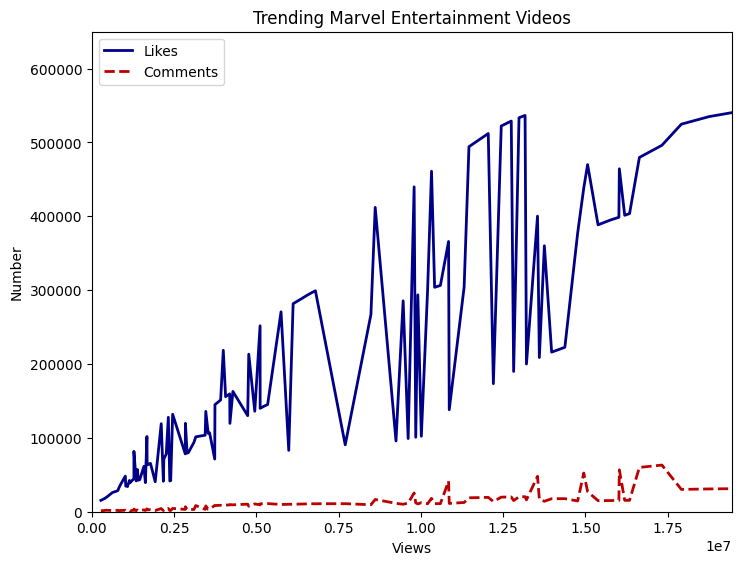

In [106]:
fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(df['views'], df['likes'], label="Likes", color='#000088', linewidth=2, linestyle='-')
ax.plot(df['views'], df['comment_count'], label="Comments", color='#BB0000', linewidth=2, linestyle='--')

ax.set_xlim((0, df['views'].max()))
ax.set_ylim((0, 650000))
ax.set_xlabel('Views')
ax.set_ylabel('Number')
ax.set_title('Trending Marvel Entertainment Videos')
ax.legend(loc='upper left')

fig

Compare that code to the functional interface.

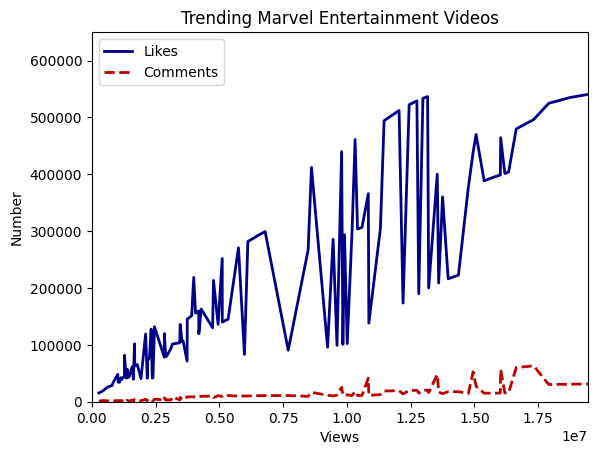

In [42]:
plt.plot(df['views'], df['likes'], label="Likes", color='#000088', linewidth=2, linestyle='-')
plt.plot(df['views'], df['comment_count'], label="Comments", color='#BB0000', linewidth=2, linestyle='--')

plt.xlim((0, df['views'].max()))
plt.ylim((0, 650000))
plt.xlabel('Views')
plt.ylabel('Number')
plt.title('Trending Marvel Entertainment Videos')
plt.legend(loc='upper left')

As you can see, the code is almost identical between the two interfaces.

## Benefits of the Object-Oriented Approach

Is there a reason to use one over the other? Yes!

Objects offers some significant advantages over global functions.

### Benefit #1: Objects can be built up over multiple cells. 

   - The elements of your plot are explicitly stored in variables (fig, ax) to which you have access.
   - Comparatively, the functional interface works best when all plot elements are created in the same cell because the Figure and Axes objects are hidden from you. (It is possible to overcome this, but requires jumping through a lot of non-standard Jupyter hoops. Easier to use objects.)


In [45]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [46]:
ax = fig.add_axes([0, 0, 1, 1])

In [47]:
ax.plot(df['views'], df['likes'])

In [48]:
ax.set_xlabel('Views')
ax.set_ylabel('Likes')

Text(0, 0.5, 'Likes')

In [49]:
ax.set_title('Trending Marvel Entertainment Videos')

Text(0.5, 1.0, 'Trending Marvel Entertainment Videos')

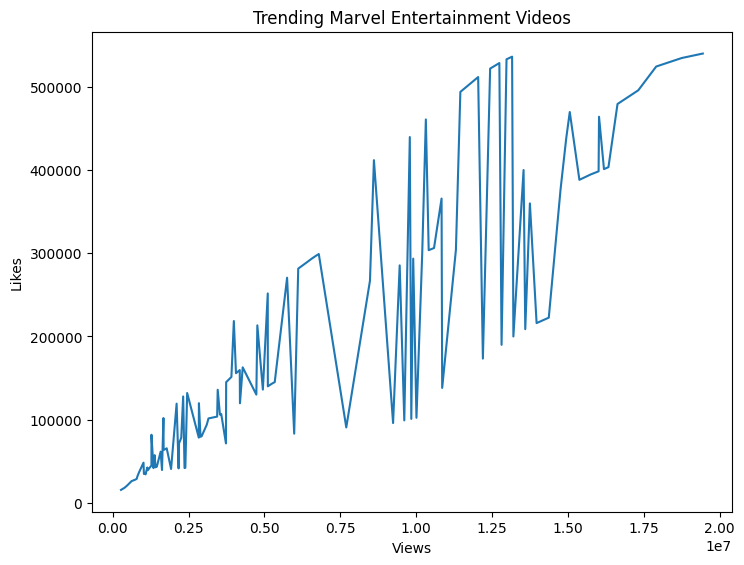

In [50]:
fig

The functional interface will not work as you might expect if you break your code up over multiple cells.

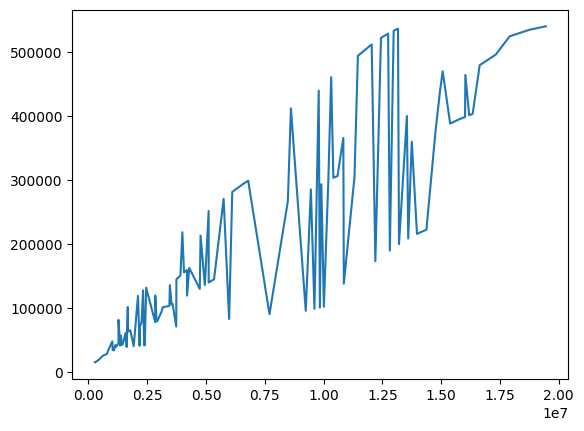

In [51]:
plt.plot(df['views'], df['likes'])

Text(0, 0.5, 'Likes')

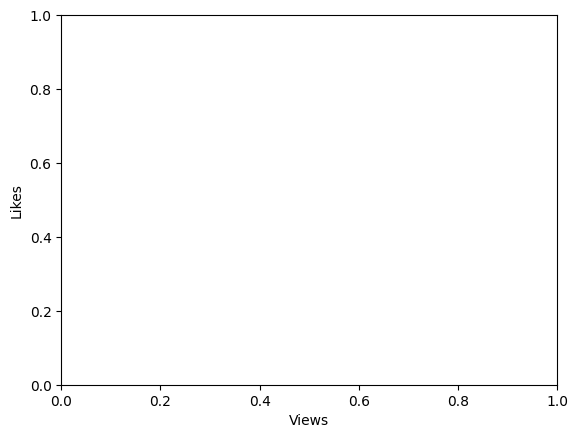

In [52]:
plt.xlabel('Views')
plt.ylabel('Likes')

Text(0.5, 1.0, 'Trending Marvel Entertainment Videos')

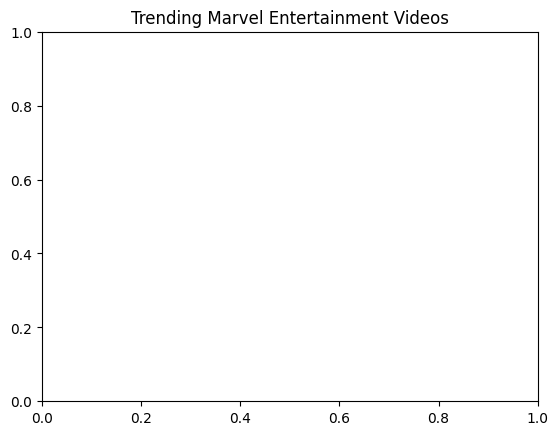

In [53]:
plt.title('Trending Marvel Entertainment Videos')

You can see that customizations applied each time are lost outside of the cell.

### Benefit #2: You can pass objects around.
   - For example, you can define functions that return Figures and Axes. This helps create more reusable, concise and modular code.

In [58]:
def create_my_plot(df):
    fig = plt.Figure()
    ax = fig.add_axes([0, 0, 1, 1])

    ax.plot(df['views'], df['likes'], label="Likes", color='#000088', linewidth=2, linestyle='-')
    ax.plot(df['views'], df['comment_count'], label="Comments", color='#BB0000', linewidth=2, linestyle='--')

    ax.set_xlim((0, df['views'].max()))
    ax.set_ylim((0, 650000))
    ax.set_xlabel('Views')
    ax.set_ylabel('Number')
    ax.set_title('Trending Marvel Entertainment Videos')
    ax.legend(loc='upper left')

    return fig, ax

In [59]:
fig, ax = create_my_plot(df)

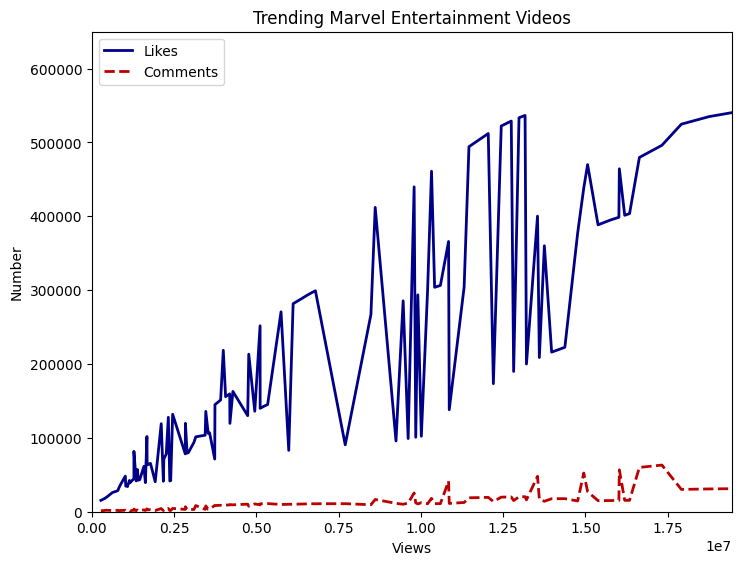

In [60]:
fig

## Multiple Axes in one Figure

Each Figure can contain multiple Axes. Each Axes could have drawn onto it whatever is needed - essentially creating multiple plots in one image.

Let's split the previous plot into two Axes. One will contain a plot of the number of comments vs likes, with the other the number of dislikes vs likes. The comments plot will be positioned in the bottom half of our figure, with the dislikes plot in the top half.

To do this, we create two Axes (ax1 and ax2). Specify the appropriate position and width/height. Then each plot is drawn on the appropriate Axes.

Text(0, 0.5, 'Comments')

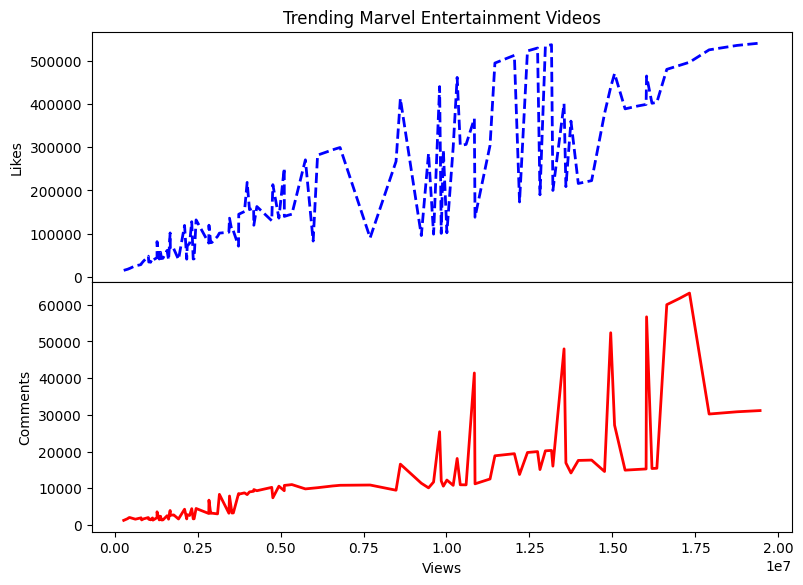

In [61]:
# create our Figure
fig = plt.figure(figsize=(7,5))

# Add two Axes objects, positioned appropriately
ax1 = fig.add_axes([0, 0.5, 1, 0.5])
ax2 = fig.add_axes([0, 0.0, 1, 0.5])

# Draw our plot onto each Axes separately
ax1.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

# Add labelling to each Axes
ax1.set_ylabel('Likes')
ax1.set_title('Trending Marvel Entertainment Videos')

ax2.set_xlabel('Views')
ax2.set_ylabel('Comments')

Creating multiple Axes in a Figure is a common operation. So much so that Matplotlib contains convenience functions for adding Axes.

``fig.subplots()`` is a convenience method to create multiple Axes in a Figure. This method divides the area in your figure in a grid of subplots, with the first two arguments specfying the number of Axes per row and column.

Text(0, 0.5, 'Comments')

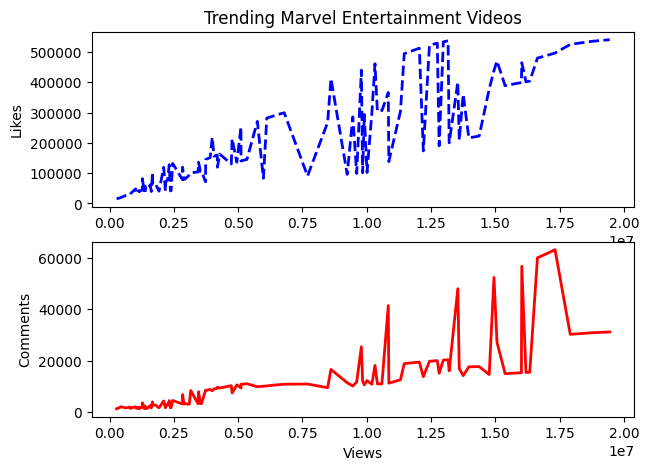

In [62]:
# create our Figure
fig = plt.figure(figsize=(7,5))

# Add two Axes objects, positioned appropriately
ax1, ax2 = fig.subplots(2, 1)

# Draw our plot onto each Axes separately
ax1.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

# Add labelling to each Axes
ax1.set_ylabel('Likes')
ax1.set_title('Trending Marvel Entertainment Videos')

ax2.set_xlabel('Views')
ax2.set_ylabel('Comments')

There is also a convenience function to create your Figure and all Axes objects in one step by using the global function, ``plt.subplots()``.

Text(0, 0.5, 'Comments')

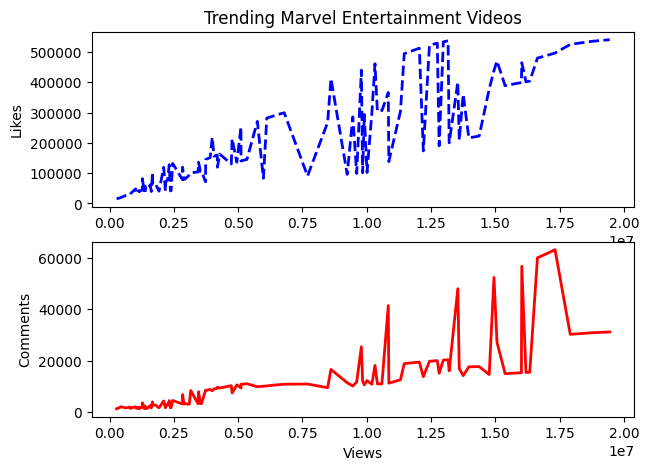

In [63]:
# create our Figure and Axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,5))

# Draw our plot onto each Axes separately
ax1.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

# Add labelling to each Axes
ax1.set_ylabel('Likes')
ax1.set_title('Trending Marvel Entertainment Videos')

ax2.set_xlabel('Views')
ax2.set_ylabel('Comments')

Overall, it is common to just use ``subplots()`` instead of ``figure()`` and ``add_axes()``.

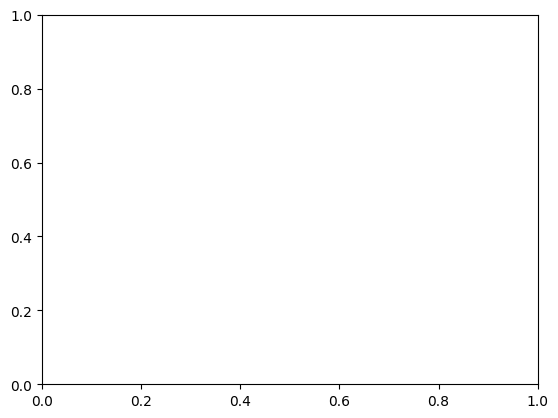

In [64]:
fig, ax = plt.subplots()  # Returns a Figure with 1 Axes

And, in fact, the Axes returned by ``subplots()`` are slightly different than a regular Axes. They are instances of the Axes class with additional functionality to handle positioning multiple Axes within a Figure.

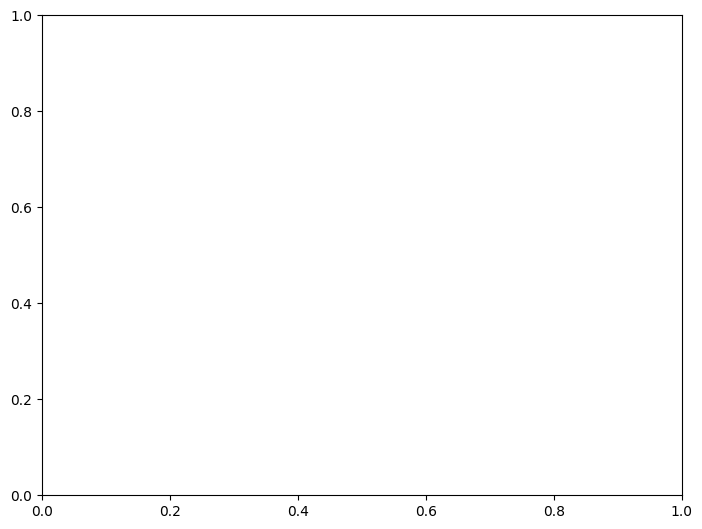

In [65]:
fig = plt.figure()
ax_explicit = fig.add_axes([0, 0, 1, 1])

In [66]:
type(ax_explicit)

matplotlib.axes._axes.Axes

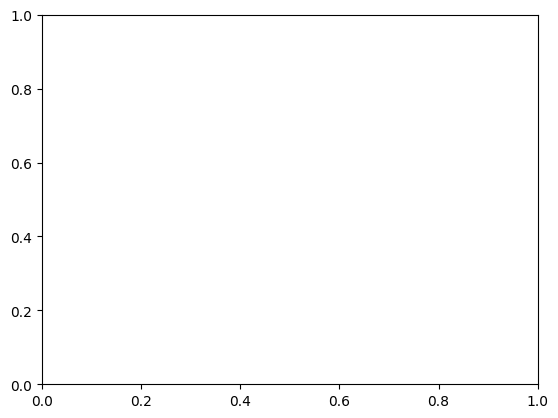

In [67]:
fig, ax_subplots = plt.subplots()

In [68]:
type(ax_subplots)

matplotlib.axes._axes.Axes

You can notice the slight difference in the plot positioning between the explicitly added Axes and the ones created by subplots. In practice, this often doesn't matter, except if you are saving to file.

## Saving to File

Figure objects have a ``fig.savefig()`` method, the counterpart to the global function ``plt.savefig()``.

Text(0, 0.5, 'Comments')

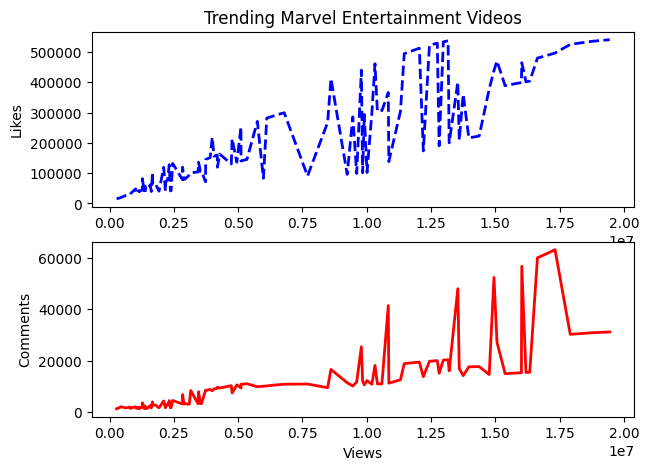

In [72]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,5))

ax1.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

ax1.set_ylabel('Likes')
ax1.set_title('Trending Marvel Entertainment Videos')
ax2.set_xlabel('Views')
ax2.set_ylabel('Comments')

In [73]:
fig.savefig('my_plot.pdf')

(Note how we have just called our fig variable from the preceding cell, rather than duplicating all the code again.)

Let's compare explicity added Axes to Axes made with subplots.

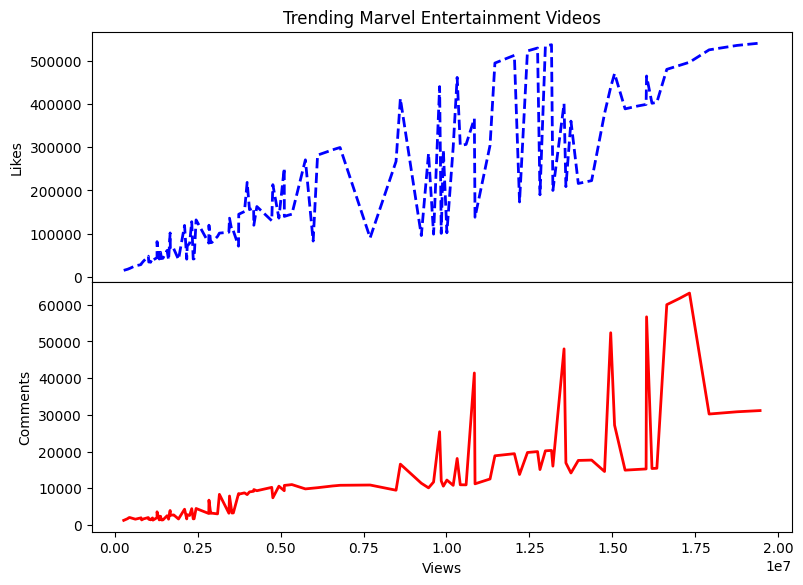

In [74]:
# create our Figure
fig_explicit = plt.figure(figsize=(7,5))

# # Add two Axes objects, positioned appropriately
# ax1_ex = fig_explicit.add_axes([0.15, 0.5, 0.85, 0.5])
# ax2_ex = fig_explicit.add_axes([0.15, 0.1, 0.85, 0.5])
ax1_ex = fig_explicit.add_axes([0, 0.5, 1, 0.5])
ax2_ex = fig_explicit.add_axes([0, 0.0, 1, 0.5])

ax1_ex.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2_ex.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

ax1_ex.set_ylabel('Likes')
ax1_ex.set_title('Trending Marvel Entertainment Videos')
ax2_ex.set_xlabel('Views')
ax2_ex.set_ylabel('Comments')

fig_explicit.savefig('axes-explicit.pdf')

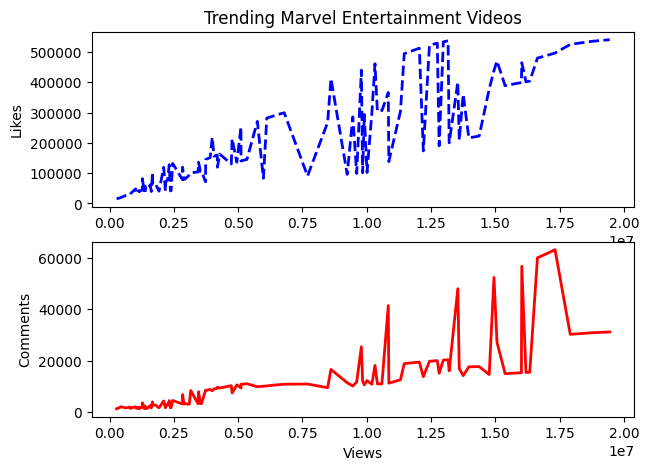

In [75]:
# create our Figure
fig_subplots, (ax1_sp, ax2_sp) = plt.subplots(2, 1, figsize=(7,5))

ax1_sp.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2_sp.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

ax1_sp.set_ylabel('Likes')
ax1_sp.set_title('Trending Marvel Entertainment Videos')
ax2_sp.set_xlabel('Views')
ax2_sp.set_ylabel('Comments')

fig_subplots.savefig('axes-subplots.pdf')

With the explicitly added Axes, they were defined to reside between 0 to 100% of the width and height of your Figure. That defines the box which contains the plot. Other elements, such as the labelling, is technically outside that region. It is outside of the canvas that gets saved to file. Inside of a Jupyter notebook, these are displayed, but are not when saved to file.

To counteract this, the explicitly added Axes will have to be manually positioned to leave room for labels, tick marks, and other plot elements outside of the box.

You may think that ``tight_layout()`` will solve this. And Figure objects do have a ``tight_layout()`` method, again mirroring the functional API.

However, for explicitly added Axes, because their position have been defined by *you*, Matplotlib will not move them. It will only throw a warning.

In [77]:
fig_explicit.tight_layout()
fig_explicit.savefig('axes-explicit.pdf')

/tmp/ipykernel_39265/2988120374.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_explicit.tight_layout()


In [78]:
type(ax1_ex)

matplotlib.axes._axes.Axes

Axes added by subplots have extra functionalty that extend the Axes class so that Matplotlib can adjust them.

In [ ]:
type(ax1_sp)

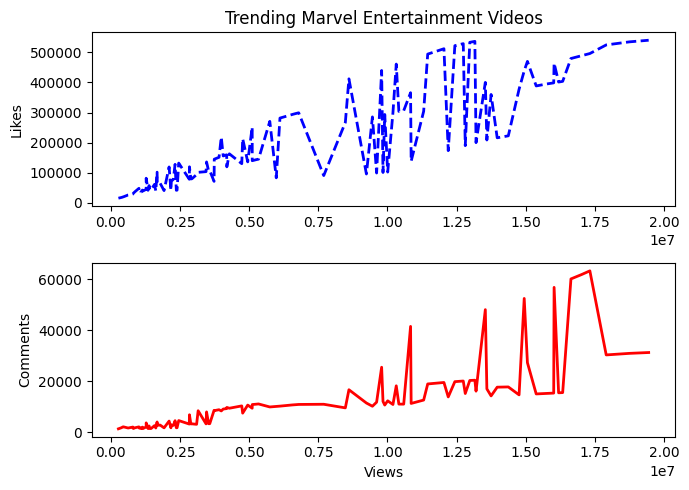

In [79]:
fig_subplots.tight_layout()
fig_subplots

No warning. No elements overlap each other.

## Obtaining the Figure and Axes from the Functional API

The functional API creates Figure and Axes objects of its own under the hood. It is possible to access these.

``plt.gcf()`` and ``plt.gca()`` get the current Figure or current Axes that the functional API is using.

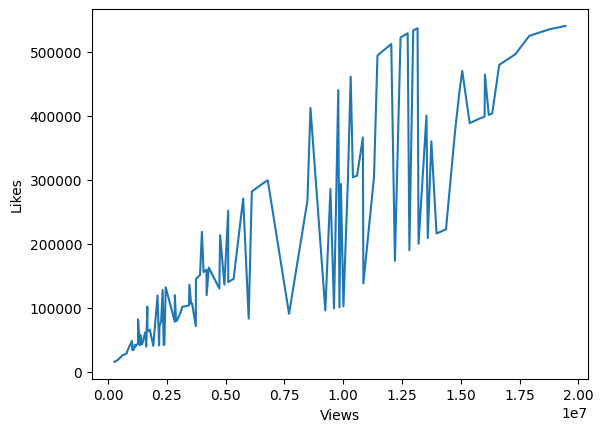

In [80]:
plt.plot(df['views'], df['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')

fig = plt.gcf()
ax = plt.gca()

In [ ]:
fig

Of course, the ability to extract the current Figure or Axes created by the functional API is only available inside the current cell.

Text(0, 0.5, 'Likes')

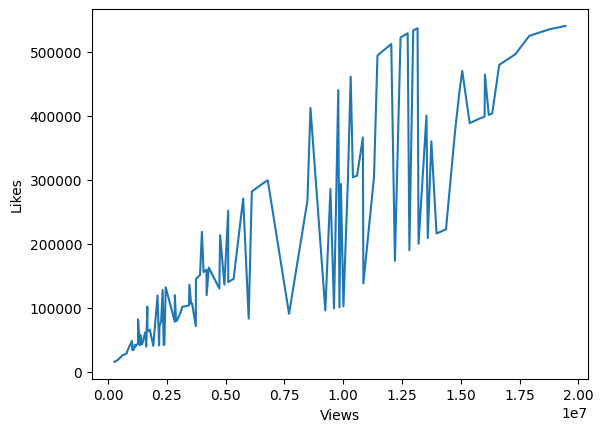

In [83]:
plt.plot(df['views'], df['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')

In [84]:
fig = plt.gcf()

<Figure size 640x480 with 0 Axes>

In [86]:
fig

<Figure size 640x480 with 0 Axes>

## Beyond Figure and Axes

``Figure`` and ``Axes`` are the two primary objects in Matplotlib. Most times you won't need to go any deeper than these two.

Other properties are accessible through getter and setter methods. We have already used a number of setter methods (``set_xlim()``, ``set_xlabel()``, ``set_title()``, etc). Many properties are also their own object type, with their own getter and setter methods.

Let's start fresh and create our Figure and Axes objects.

Text(0, 0.5, 'Comments')

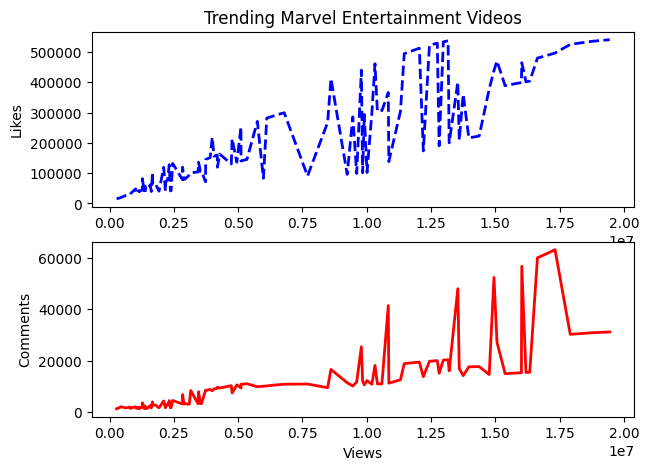

In [87]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,5))

ax1.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

ax1.set_ylabel('Likes')
ax1.set_title('Trending Marvel Entertainment Videos')
ax2.set_xlabel('Views')
ax2.set_ylabel('Comments')

Let's say we no longer like the bottom (red) line. Lines are their own object type (``Line2D``). 

Using ``get_lines()``, we can get a list of all the line objects on that Axes. The first element in this list will be the ``Line2D`` object for this line.

In [88]:
# get list of lines
lines = ax2.get_lines()

In [89]:
# get one line out of this list
line = lines[0]

In [90]:
type(line)

matplotlib.lines.Line2D

In [91]:
# set properties of the line
line.set_color('orange')
line.set_linewidth(0.8)

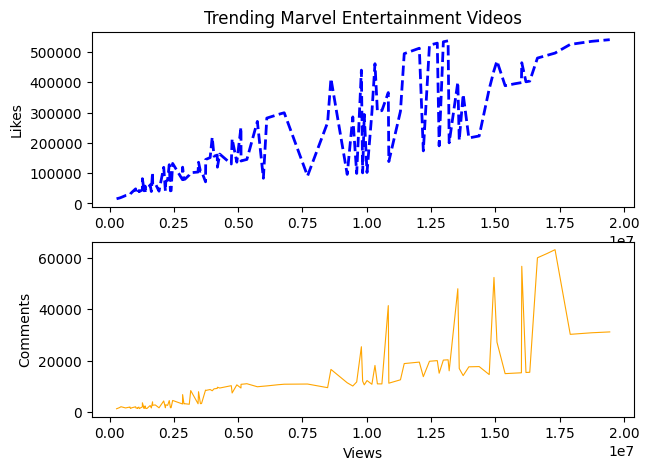

In [92]:
fig

Not everything has a dedicated object type. Tick marks are stored as lists of tick locations (floats) and tick labels (strings).

In [93]:
ax1_xticks = ax1.get_xticks()

In [94]:
ax1_xticks

array([-2500000.,        0.,  2500000.,  5000000.,  7500000., 10000000.,
       12500000., 15000000., 17500000., 20000000., 22500000.])

In [95]:
ax1_xticklabels = ax1.get_xticklabels()

In [96]:
ax1_xticklabels

[Text(-2500000.0, 0, '−0.25'),
 Text(0.0, 0, '0.00'),
 Text(2500000.0, 0, '0.25'),
 Text(5000000.0, 0, '0.50'),
 Text(7500000.0, 0, '0.75'),
 Text(10000000.0, 0, '1.00'),
 Text(12500000.0, 0, '1.25'),
 Text(15000000.0, 0, '1.50'),
 Text(17500000.0, 0, '1.75'),
 Text(20000000.0, 0, '2.00'),
 Text(22500000.0, 0, '2.25')]

Let's change our tick locations and labels so that they are only every million likes, and without scientific notation.

In [98]:
new_xticks = [0, 0.5e7, 1e7, 1.5e7, 2e7]
new_xticklabels = ['0', '5M', '10M', '15M', '20M']

ax1.set_xticks(new_xticks)
ax1.set_xticklabels(new_xticklabels)

ax2.set_xticks(new_xticks)
ax2.set_xticklabels(new_xticklabels)

[Text(0.0, 0, '0'),
 Text(5000000.0, 0, '5M'),
 Text(10000000.0, 0, '10M'),
 Text(15000000.0, 0, '15M'),
 Text(20000000.0, 0, '20M')]

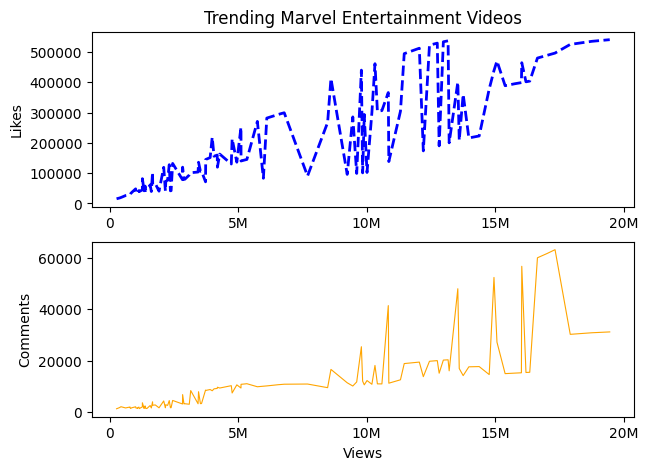

In [99]:
fig

# Summary

Matplotlib's functional API is sufficient for simple tasks. It can be used to toss up a plot quickly when doing initial data exploration or exploring simple visualizations.

The object-oriented API is preferred for any complex task. The ``Figure`` and ``Axes`` objects will persist in global memory of the notebook when defined as variables. And objects can be passed around between functions.

The functional interface is great for novice programmers. However, you are not scared of objects because you are all computer scientists. 

The underlying ``Figure`` and ``Axes`` objects created when using the functional API can be accessed if needed, but in such a case you might as well have just started with the object-oriented interface from the beginning.

Create new ``Figure`` objects using ``plt.subplots()``. This will also create your ``Axes`` object(s) for you, and they will be specially extended ``Axes`` objects that Matplotlib will be able to position more easily.

The method ``.plot()`` on your ``Axes`` objects will plot lines.

Other properties can be accessed and modified through getter and setter methods (or the getter and setter methods of children objects).

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,5))

ax1.plot(df['views'], df['likes'], label="Likes", color='blue', linewidth=2, linestyle='--')
ax2.plot(df['views'], df['comment_count'], label="Comments", color='red', linewidth=2)

ax1.set_ylabel('Likes')
ax1.set_title('Trending Marvel Entertainment Videos')
ax2.set_xlabel('Views')
ax2.set_ylabel('Comments')

new_xticks = [0, 0.5e7, 1e7, 1.5e7, 2e7]
new_xticklabels = ['0', '5M', '10M', '15M', '20M']

ax1.set_xticks(new_xticks)
ax1.set_xticklabels(new_xticklabels)

ax2.set_xticks(new_xticks)
ax2.set_xticklabels(new_xticklabels)

ax1.set_yticks([0, 200000, 400000, 600000])
ax1.set_yticklabels(['0', '200K', '400K', '600K'])

ax2.set_yticks([0, 20000, 40000, 60000])
ax2.set_yticklabels(['0', '20K', '40K', '60K'])

fig.tight_layout()

At this point we start to see the pros and cons of Matplotlib.

**Pro:** Everything can be customized.\
**Con:** It can take a lot of manual effort to customize everything.